# Multi-Agent Reinforcement Learning Analysis for Nuel-Sim

This notebook analyzes the MARL implementation used in the nuel-sim project, which implements a **Double Deep Q-Network (DDQN) with Parameter Sharing** approach for multi-agent learning in a competitive shooting game environment.

## 1. Import Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import networkx as nx
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Understanding the MARL System in Nuel-Sim

The nuel-sim project implements a **Parameter Sharing Multi-Agent Deep Q-Network (PS-MADQN)** with the following key characteristics:

### Learning Algorithm: Double Deep Q-Network (DDQN)
- **Primary Network**: Makes action selections
- **Target Network**: Provides stable value estimates
- **Double Q-Learning**: Prevents overestimation bias by decoupling action selection and evaluation

### Multi-Agent Architecture: Parameter Sharing
- **Shared Agent**: All players use the same neural network
- **Individual Observations**: Each agent receives its own observation of the environment
- **Decentralized Execution**: Agents act independently during gameplay
- **Centralized Training**: Single network learns from all agents' experiences

In [3]:
# Define the key components of the MARL system
marl_components = {
    'Learning Algorithm': 'Double Deep Q-Network (DDQN)',
    'Multi-Agent Approach': 'Parameter Sharing',
    'Training': 'Centralized',
    'Execution': 'Decentralized',
    'Experience Replay': 'Shared Replay Buffer',
    'Exploration': 'Epsilon-Greedy with Linear Decay',
    'Network Architecture': 'Feed-Forward Neural Network',
    'Environment': 'Competitive Multi-Agent Game'
}

for component, description in marl_components.items():
    print(f"{component:20}: {description}")

Learning Algorithm  : Double Deep Q-Network (DDQN)
Multi-Agent Approach: Parameter Sharing
Training            : Centralized
Execution           : Decentralized
Experience Replay   : Shared Replay Buffer
Exploration         : Epsilon-Greedy with Linear Decay
Network Architecture: Feed-Forward Neural Network
Environment         : Competitive Multi-Agent Game


## 3. Types of Learning in MARL - Comparison

Let's compare different MARL learning paradigms and understand why parameter sharing was chosen for nuel-sim:

In [4]:
# Create comparison table of MARL approaches
import pandas as pd

marl_approaches = {
    'Approach': ['Independent Learning', 'Parameter Sharing', 'CTDE', 'Communication-Based'],
    'Description': [
        'Each agent learns independently',
        'All agents share same network (Used in nuel-sim)',
        'Centralized training, decentralized execution',
        'Agents communicate during learning'
    ],
    'Pros': [
        'Simple, scalable',
        'Sample efficient, homogeneous agents',
        'Stable training, coordinated policies',
        'Rich information sharing'
    ],
    'Cons': [
        'Non-stationary environment',
        'Limited heterogeneity',
        'Complex implementation',
        'Communication overhead'
    ],
    'Best For': [
        'Diverse agent roles',
        'Homogeneous competitive games',
        'Cooperative tasks',
        'Complex coordination tasks'
    ]
}

df = pd.DataFrame(marl_approaches)
print("MARL Approaches Comparison:")
print("=" * 80)
for _, row in df.iterrows():
    print(f"\n{row['Approach']}:")
    print(f"  Description: {row['Description']}")
    print(f"  Pros: {row['Pros']}")
    print(f"  Cons: {row['Cons']}")
    print(f"  Best For: {row['Best For']}")

MARL Approaches Comparison:

Independent Learning:
  Description: Each agent learns independently
  Pros: Simple, scalable
  Cons: Non-stationary environment
  Best For: Diverse agent roles

Parameter Sharing:
  Description: All agents share same network (Used in nuel-sim)
  Pros: Sample efficient, homogeneous agents
  Cons: Limited heterogeneity
  Best For: Homogeneous competitive games

CTDE:
  Description: Centralized training, decentralized execution
  Pros: Stable training, coordinated policies
  Cons: Complex implementation
  Best For: Cooperative tasks

Communication-Based:
  Description: Agents communicate during learning
  Pros: Rich information sharing
  Cons: Communication overhead
  Best For: Complex coordination tasks


## 4. Nuel-Sim Environment Analysis

The nuel-sim environment is a competitive multi-agent game where agents (players) must survive by making strategic shooting decisions:

In [5]:
# Analyze the environment characteristics
environment_analysis = {
    'Environment Type': 'Competitive Multi-Agent Game',
    'Number of Agents': 'Variable (typically 3-8 players)',
    'Action Space': 'Discrete (choose target to shoot)',
    'Observation Space': 'Continuous (threat levels, accuracies, etc.)',
    'Reward Structure': {
        'Survival bonus': '+0.1 per turn alive',
        'Dead target penalty': '-1.0 for shooting dead players',
        'Winning bonus': 'NUM_PLAYERS / alive_players',
        'No hit bonus': 'Prevents exploitation'
    },
    'Episode Termination': 'When ≤1 player remains alive or max rounds reached',
    'Key Challenge': 'Non-stationary environment due to multiple learning agents'
}

print("Nuel-Sim Environment Characteristics:")
print("=" * 50)
for key, value in environment_analysis.items():
    if key == 'Reward Structure':
        print(f"\n{key}:")
        for reward_type, reward_value in value.items():
            print(f"  - {reward_type}: {reward_value}")
    else:
        print(f"\n{key}: {value}")

Nuel-Sim Environment Characteristics:

Environment Type: Competitive Multi-Agent Game

Number of Agents: Variable (typically 3-8 players)

Action Space: Discrete (choose target to shoot)

Observation Space: Continuous (threat levels, accuracies, etc.)

Reward Structure:
  - Survival bonus: +0.1 per turn alive
  - Dead target penalty: -1.0 for shooting dead players
  - Winning bonus: NUM_PLAYERS / alive_players
  - No hit bonus: Prevents exploitation

Episode Termination: When ≤1 player remains alive or max rounds reached

Key Challenge: Non-stationary environment due to multiple learning agents


## 5. Neural Network Architecture Visualization

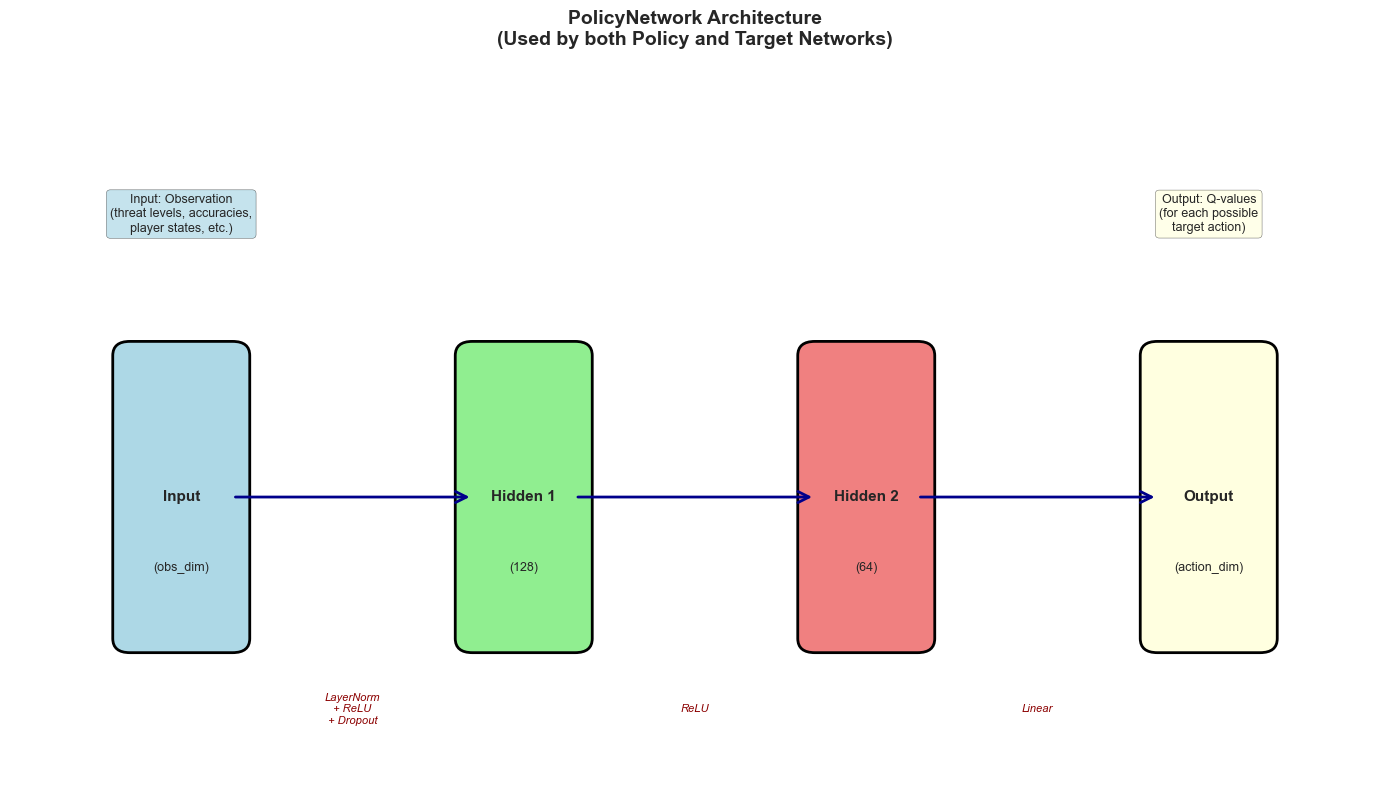

In [6]:
# Create neural network architecture diagram
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Network layers
layers = {
    'Input': {'nodes': 'obs_dim', 'x': 1, 'color': 'lightblue'},
    'Hidden 1': {'nodes': '128', 'x': 3, 'color': 'lightgreen'},
    'Hidden 2': {'nodes': '64', 'x': 5, 'color': 'lightcoral'},
    'Output': {'nodes': 'action_dim', 'x': 7, 'color': 'lightyellow'}
}

# Draw network layers
for layer_name, layer_info in layers.items():
    # Draw layer box
    rect = FancyBboxPatch(
        (layer_info['x'] - 0.3, 2), 0.6, 2,
        boxstyle="round,pad=0.1",
        facecolor=layer_info['color'],
        edgecolor='black',
        linewidth=2
    )
    ax.add_patch(rect)
    
    # Add layer label
    ax.text(layer_info['x'], 3, layer_name, ha='center', va='center', 
            fontsize=11, fontweight='bold')
    ax.text(layer_info['x'], 2.5, f"({layer_info['nodes']})", ha='center', va='center', 
            fontsize=9)

# Draw connections
for i, (current_layer, next_layer) in enumerate(zip(list(layers.keys())[:-1], list(layers.keys())[1:])):
    current_x = layers[current_layer]['x']
    next_x = layers[next_layer]['x']
    
    # Draw arrow
    arrow = patches.FancyArrowPatch(
        (current_x + 0.3, 3), (next_x - 0.3, 3),
        arrowstyle='->', mutation_scale=20, color='darkblue', linewidth=2
    )
    ax.add_patch(arrow)

# Add activation functions
activations = ['LayerNorm\n+ ReLU\n+ Dropout', 'ReLU', 'Linear']
for i, activation in enumerate(activations):
    ax.text(2 + i*2, 1.5, activation, ha='center', va='center', 
            fontsize=8, style='italic', color='darkred')

# Add title and labels
ax.set_title('PolicyNetwork Architecture\n(Used by both Policy and Target Networks)', 
             fontsize=14, fontweight='bold', pad=20)

# Add input/output descriptions
ax.text(1, 5, 'Input: Observation\n(threat levels, accuracies,\nplayer states, etc.)', 
        ha='center', va='center', fontsize=9, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

ax.text(7, 5, 'Output: Q-values\n(for each possible\ntarget action)', 
        ha='center', va='center', fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.7))

ax.set_xlim(0, 8)
ax.set_ylim(1, 6)
ax.axis('off')

plt.tight_layout()
plt.show()

## 6. Double Q-Learning Process Visualization

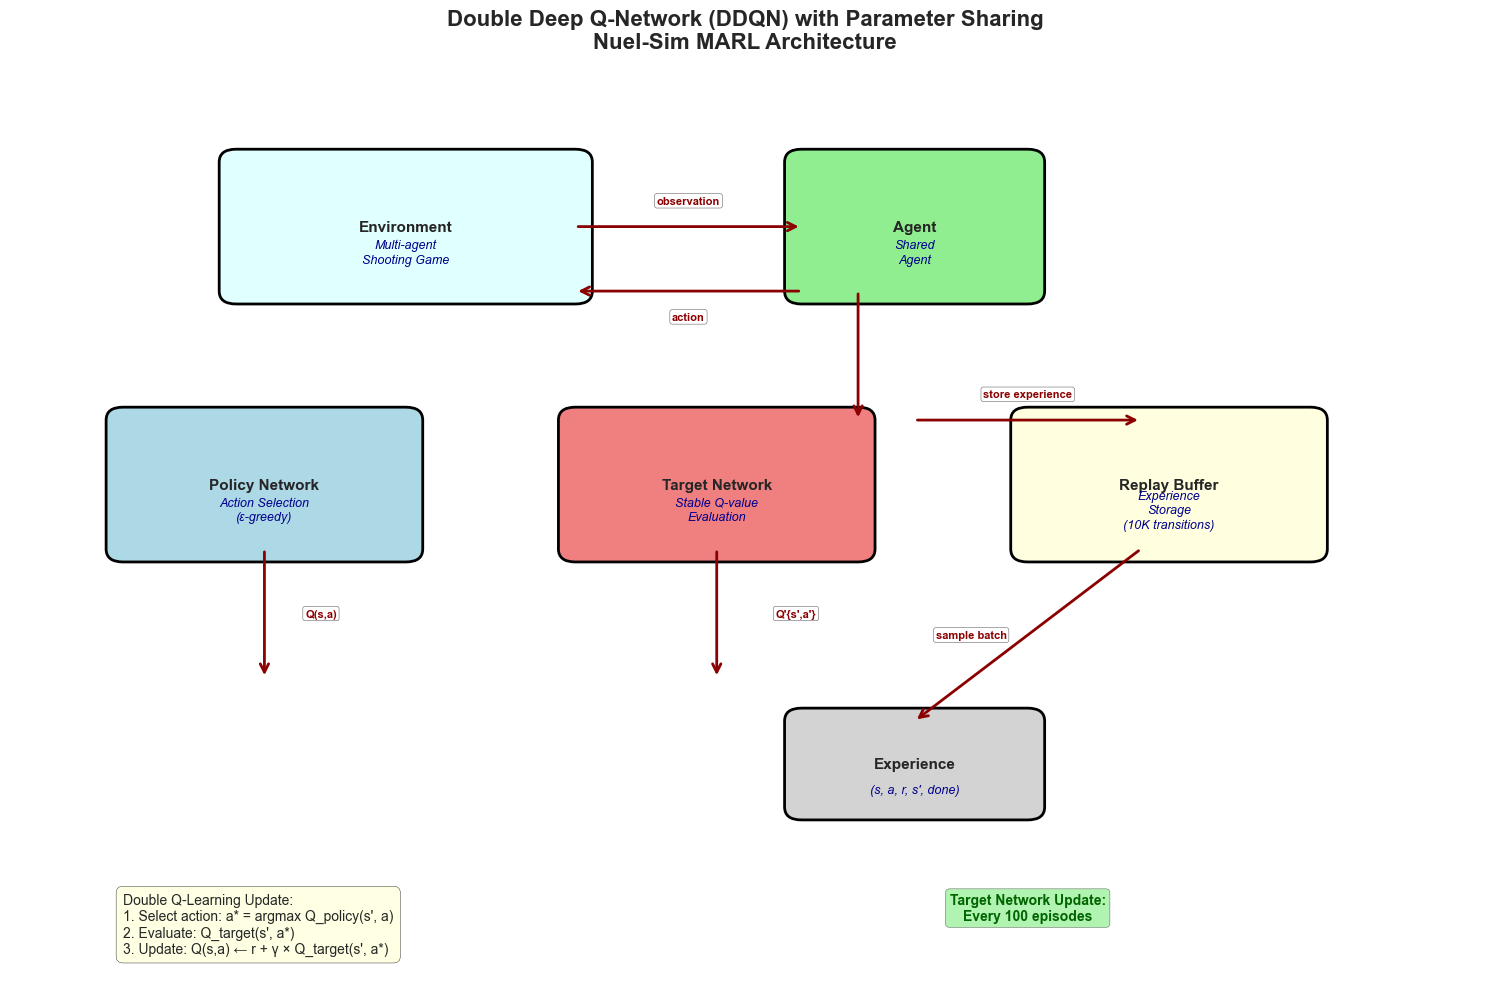

In [7]:
# Create Double Q-Learning process diagram
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Define positions for different components
components = {
    'Environment': {'pos': (2, 8), 'size': (3, 1.5), 'color': 'lightcyan'},
    'Agent': {'pos': (7, 8), 'size': (2, 1.5), 'color': 'lightgreen'},
    'Policy Network': {'pos': (1, 5), 'size': (2.5, 1.5), 'color': 'lightblue'},
    'Target Network': {'pos': (5, 5), 'size': (2.5, 1.5), 'color': 'lightcoral'},
    'Replay Buffer': {'pos': (9, 5), 'size': (2.5, 1.5), 'color': 'lightyellow'},
    'Experience': {'pos': (7, 2), 'size': (2, 1), 'color': 'lightgray'}
}

# Draw components
for name, info in components.items():
    rect = FancyBboxPatch(
        info['pos'], info['size'][0], info['size'][1],
        boxstyle="round,pad=0.15",
        facecolor=info['color'],
        edgecolor='black',
        linewidth=2
    )
    ax.add_patch(rect)
    
    # Add component label
    center_x = info['pos'][0] + info['size'][0] / 2
    center_y = info['pos'][1] + info['size'][1] / 2
    ax.text(center_x, center_y, name, ha='center', va='center', 
            fontsize=11, fontweight='bold')

# Add detailed labels
details = {
    'Policy Network': 'Action Selection\n(ε-greedy)',
    'Target Network': 'Stable Q-value\nEvaluation',
    'Replay Buffer': 'Experience\nStorage\n(10K transitions)',
    'Environment': 'Multi-agent\nShooting Game',
    'Agent': 'Shared\nAgent',
    'Experience': '(s, a, r, s\', done)'
}

for name, detail in details.items():
    if name in components:
        center_x = components[name]['pos'][0] + components[name]['size'][0] / 2
        center_y = components[name]['pos'][1] + components[name]['size'][1] / 2 - 0.3
        ax.text(center_x, center_y, detail, ha='center', va='center', 
                fontsize=9, style='italic', color='darkblue')

# Draw arrows with labels
arrows = [
    # (start, end, label, offset)
    ((5, 8.75), (7, 8.75), 'observation', (0, 0.3)),
    ((7, 8), (5, 8), 'action', (0, -0.3)),
    ((7.5, 8), (7.5, 6.5), '', (0, 0)),  # Agent to networks
    ((8, 6.5), (10, 6.5), 'store experience', (0, 0.3)),
    ((10, 5), (8, 3), 'sample batch', (-0.5, 0)),
    ((2.25, 5), (2.25, 3.5), 'Q(s,a)', (0.5, 0)),  # Policy network output
    ((6.25, 5), (6.25, 3.5), 'Q\'{s\',a\'}', (0.7, 0)),  # Target network output
]

for start, end, label, offset in arrows:
    arrow = patches.FancyArrowPatch(
        start, end,
        arrowstyle='->', mutation_scale=15, color='darkred', linewidth=2
    )
    ax.add_patch(arrow)
    
    if label:
        mid_x = (start[0] + end[0]) / 2 + offset[0]
        mid_y = (start[1] + end[1]) / 2 + offset[1]
        ax.text(mid_x, mid_y, label, ha='center', va='center', 
                fontsize=8, color='darkred', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))

# Add Double Q-Learning formula
formula_text = (
    "Double Q-Learning Update:\n"
    "1. Select action: a* = argmax Q_policy(s', a)\n"
    "2. Evaluate: Q_target(s', a*)\n"
    "3. Update: Q(s,a) ← r + γ × Q_target(s', a*)"
)

ax.text(1, 1, formula_text, ha='left', va='top', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.9))

# Add update frequency note
ax.text(9, 1, "Target Network Update:\nEvery 100 episodes", ha='center', va='top', 
        fontsize=10, color='darkgreen', fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

ax.set_title('Double Deep Q-Network (DDQN) with Parameter Sharing\nNuel-Sim MARL Architecture', 
             fontsize=16, fontweight='bold', pad=20)

ax.set_xlim(0, 13)
ax.set_ylim(0, 10.5)
ax.axis('off')

plt.tight_layout()
plt.show()

## 7. Training Process and Learning Curves Simulation

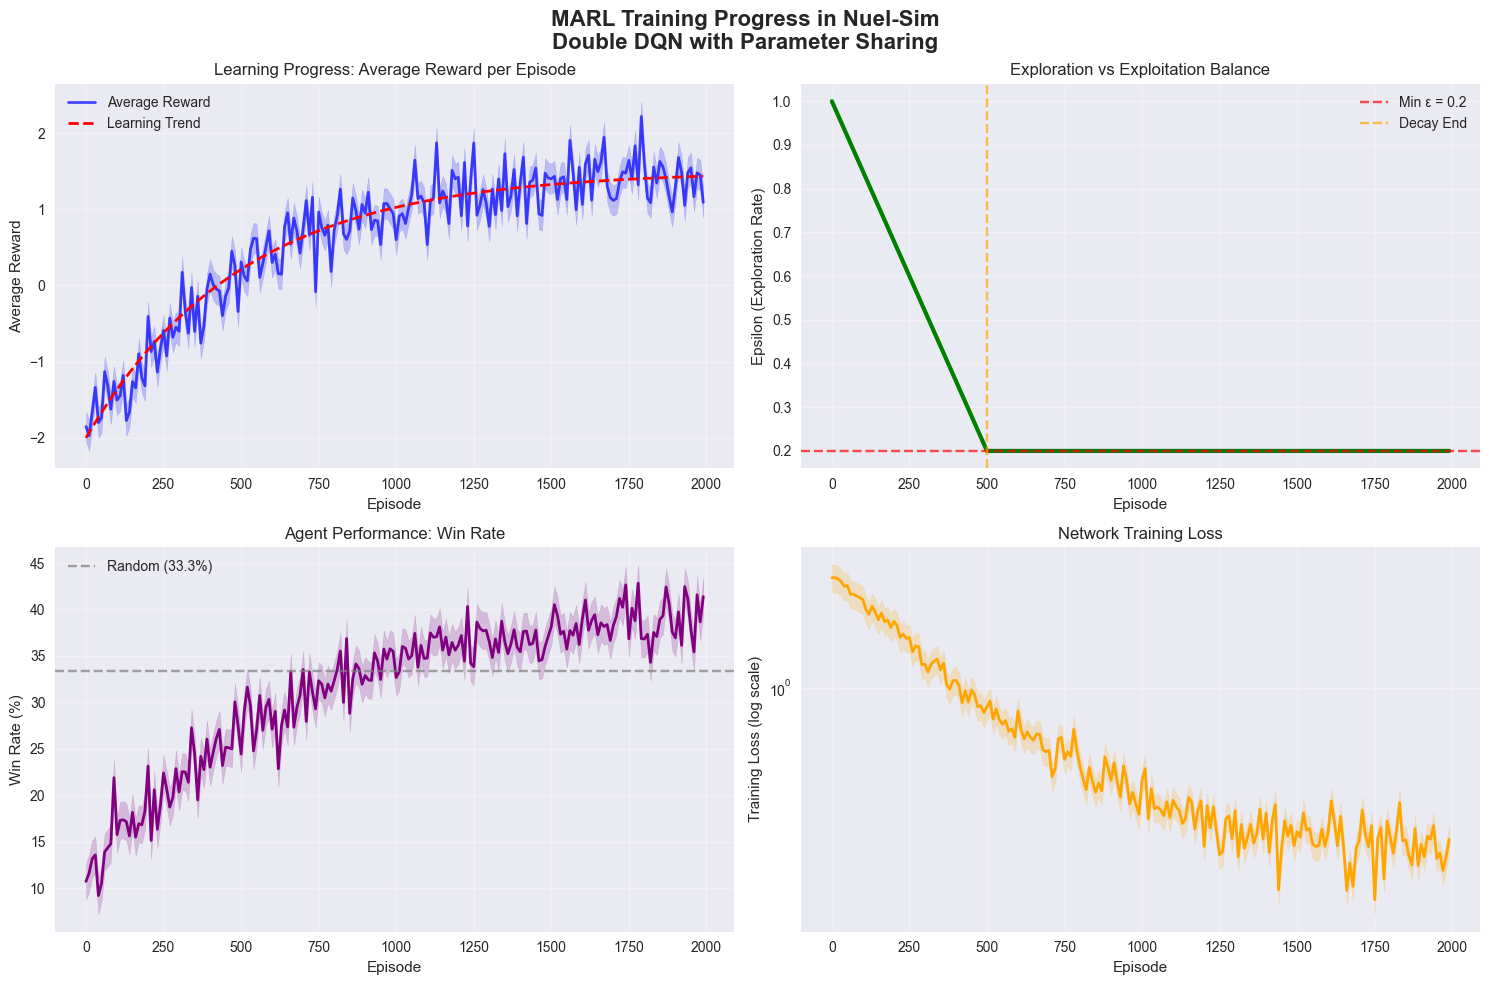

Training Summary (2000 episodes):
Final Average Reward: 1.09
Final Win Rate: 41.4%
Final Epsilon: 0.20
Final Loss: 0.333
Improvement in Reward: 2.94


In [8]:
# Simulate learning curves for the MARL system
np.random.seed(42)

# Simulate training data
episodes = np.arange(0, 2000, 10)
n_episodes = len(episodes)

# Epsilon decay (linear)
epsilon_start, epsilon_end = 1.0, 0.2
decay_episodes = int(0.25 * 2000)  # 25% of total episodes
epsilon = np.maximum(epsilon_end, epsilon_start - (epsilon_start - epsilon_end) * episodes / decay_episodes)

# Simulate average reward with noise and learning trend
base_reward = -2.0  # Starting poor performance
final_reward = 1.5  # Good performance after learning
learning_curve = base_reward + (final_reward - base_reward) * (1 - np.exp(-episodes / 500))
reward_noise = np.random.normal(0, 0.3, n_episodes)
avg_reward = learning_curve + reward_noise

# Simulate win rate
base_win_rate = 0.1  # 10% initially (random performance)
final_win_rate = 0.4  # 40% after learning (good for competitive game)
win_rate = base_win_rate + (final_win_rate - base_win_rate) * (1 - np.exp(-episodes / 600))
win_rate += np.random.normal(0, 0.02, n_episodes)  # Add noise
win_rate = np.clip(win_rate, 0, 1)

# Simulate loss (decreasing)
initial_loss = 2.0
final_loss = 0.3
loss = initial_loss * np.exp(-episodes / 400) + final_loss
loss += np.random.normal(0, 0.05, n_episodes)
loss = np.maximum(loss, 0.1)

# Create comprehensive training visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Average Reward
ax1.plot(episodes, avg_reward, 'b-', linewidth=2, alpha=0.7, label='Average Reward')
ax1.plot(episodes, learning_curve, 'r--', linewidth=2, label='Learning Trend')
ax1.fill_between(episodes, avg_reward - 0.2, avg_reward + 0.2, alpha=0.2, color='blue')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average Reward')
ax1.set_title('Learning Progress: Average Reward per Episode')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. Epsilon Decay
ax2.plot(episodes, epsilon, 'g-', linewidth=3)
ax2.axhline(y=epsilon_end, color='r', linestyle='--', alpha=0.7, label=f'Min ε = {epsilon_end}')
ax2.axvline(x=decay_episodes, color='orange', linestyle='--', alpha=0.7, label='Decay End')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Epsilon (Exploration Rate)')
ax2.set_title('Exploration vs Exploitation Balance')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Win Rate
ax3.plot(episodes, win_rate * 100, 'purple', linewidth=2)
ax3.axhline(y=100/3, color='gray', linestyle='--', alpha=0.7, label='Random (33.3%)')
ax3.fill_between(episodes, (win_rate - 0.02) * 100, (win_rate + 0.02) * 100, alpha=0.2, color='purple')
ax3.set_xlabel('Episode')
ax3.set_ylabel('Win Rate (%)')
ax3.set_title('Agent Performance: Win Rate')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 4. Training Loss
ax4.semilogy(episodes, loss, 'orange', linewidth=2)
ax4.fill_between(episodes, loss * 0.9, loss * 1.1, alpha=0.2, color='orange')
ax4.set_xlabel('Episode')
ax4.set_ylabel('Training Loss (log scale)')
ax4.set_title('Network Training Loss')
ax4.grid(True, alpha=0.3)

plt.suptitle('MARL Training Progress in Nuel-Sim\nDouble DQN with Parameter Sharing', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Training Summary (2000 episodes):")
print(f"Final Average Reward: {avg_reward[-1]:.2f}")
print(f"Final Win Rate: {win_rate[-1]*100:.1f}%")
print(f"Final Epsilon: {epsilon[-1]:.2f}")
print(f"Final Loss: {loss[-1]:.3f}")
print(f"Improvement in Reward: {avg_reward[-1] - avg_reward[0]:.2f}")

## 8. Multi-Agent Interaction Dynamics

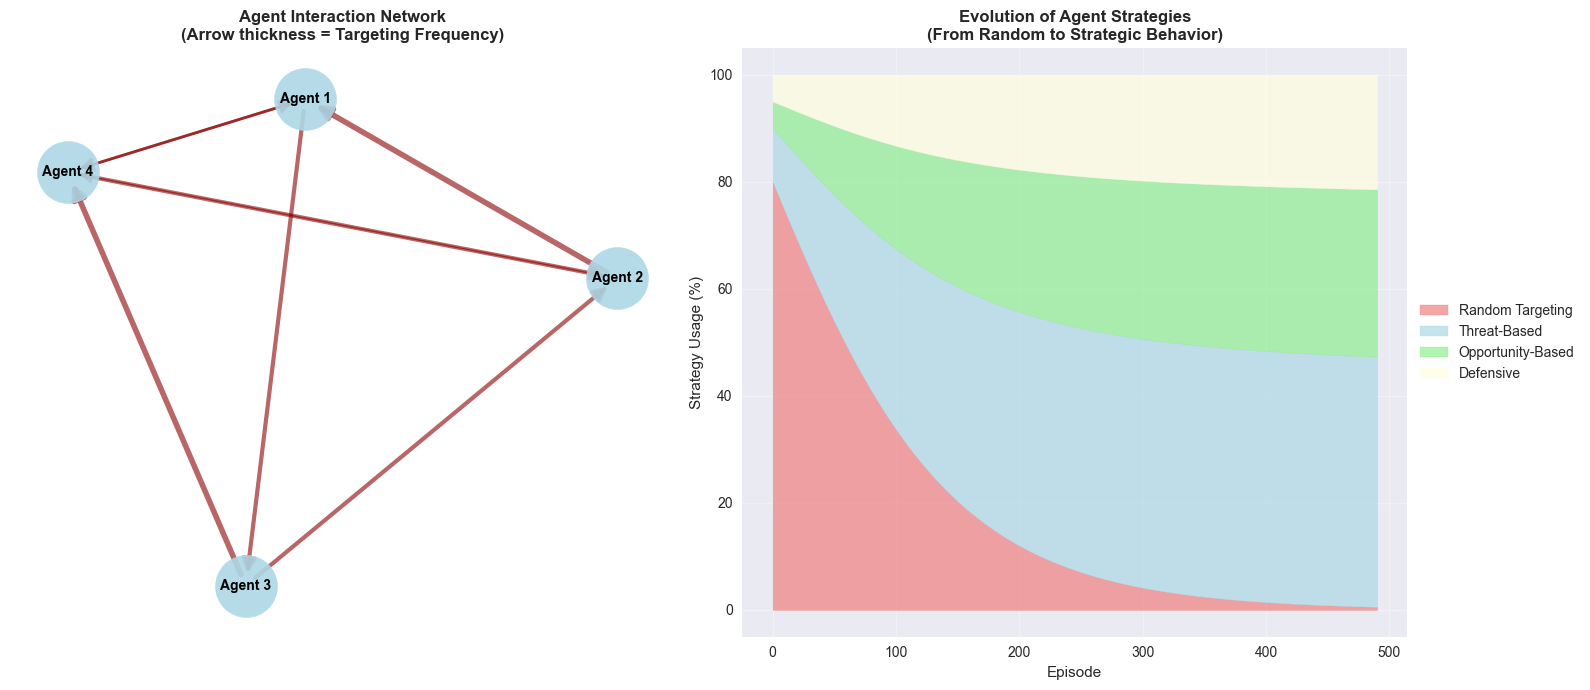

In [9]:
# Visualize multi-agent interaction patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# 1. Agent Interaction Network
G = nx.DiGraph()
agents = ['Agent 1', 'Agent 2', 'Agent 3', 'Agent 4']
G.add_nodes_from(agents)

# Add edges representing shooting interactions (who targets whom)
interactions = [
    ('Agent 1', 'Agent 3', 0.3),
    ('Agent 1', 'Agent 4', 0.2),
    ('Agent 2', 'Agent 1', 0.4),
    ('Agent 2', 'Agent 4', 0.1),
    ('Agent 3', 'Agent 2', 0.3),
    ('Agent 3', 'Agent 4', 0.4),
    ('Agent 4', 'Agent 1', 0.2),
    ('Agent 4', 'Agent 2', 0.3),
]

for source, target, weight in interactions:
    G.add_edge(source, target, weight=weight)

# Draw the network
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                       node_size=2000, alpha=0.9, ax=ax1)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax1)

# Draw edges with thickness proportional to interaction frequency
edges = G.edges(data=True)
for source, target, data in edges:
    weight = data['weight']
    nx.draw_networkx_edges(G, pos, [(source, target)], 
                          width=weight*10, alpha=0.6, 
                          edge_color='darkred', 
                          arrowsize=20, ax=ax1)

ax1.set_title('Agent Interaction Network\n(Arrow thickness = Targeting Frequency)', 
              fontsize=12, fontweight='bold')
ax1.axis('off')

# 2. Learning Strategy Evolution
episodes_strategy = np.arange(0, 500, 10)
n_strategy = len(episodes_strategy)

# Simulate strategy evolution (from random to strategic)
strategies = {
    'Random Targeting': 80 * np.exp(-episodes_strategy / 100),
    'Threat-Based': 10 + 40 * (1 - np.exp(-episodes_strategy / 150)),
    'Opportunity-Based': 5 + 30 * (1 - np.exp(-episodes_strategy / 200)),
    'Defensive': 5 + 20 * (1 - np.exp(-episodes_strategy / 250))
}

# Normalize to 100%
total = np.zeros(n_strategy)
for strategy_values in strategies.values():
    total += strategy_values

for strategy_name in strategies:
    strategies[strategy_name] = (strategies[strategy_name] / total) * 100

# Create stacked area chart
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
bottom = np.zeros(n_strategy)

for i, (strategy_name, values) in enumerate(strategies.items()):
    ax2.fill_between(episodes_strategy, bottom, bottom + values, 
                     alpha=0.7, color=colors[i], label=strategy_name)
    bottom += values

ax2.set_xlabel('Episode')
ax2.set_ylabel('Strategy Usage (%)')
ax2.set_title('Evolution of Agent Strategies\n(From Random to Strategic Behavior)', 
              fontsize=12, fontweight='bold')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Key Advantages of the Chosen MARL Approach

The nuel-sim implementation uses **Parameter Sharing DDQN** which provides several benefits for this competitive environment:

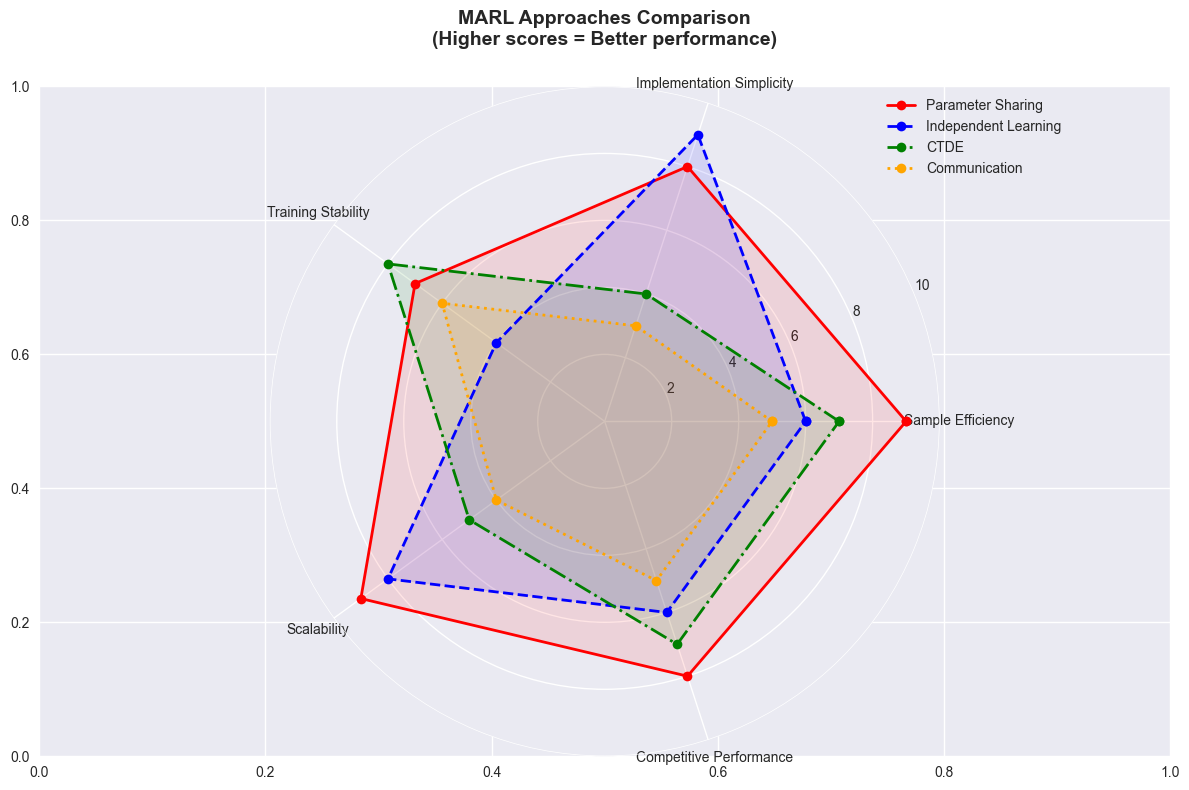


Why Parameter Sharing DDQN was chosen for Nuel-Sim:
   1. **High Sample Efficiency**: All agents contribute to learning the same policy
   2. **Homogeneous Agents**: All players have similar roles (survive and eliminate others)
   3. **Simplicity**: Easier to implement and debug than CTDE approaches
   4. **Scalability**: Adding more players doesn't increase network complexity
   5. **Competitive Nature**: Agents naturally learn competitive strategies
   6. **Double Q-Learning**: Prevents overestimation bias common in multi-agent settings


In [10]:
# Create advantage comparison visualization
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

advantages = {
    'Sample Efficiency': {
        'Parameter Sharing': 9,
        'Independent Learning': 6,
        'CTDE': 7,
        'Communication': 5
    },
    'Implementation Simplicity': {
        'Parameter Sharing': 8,
        'Independent Learning': 9,
        'CTDE': 4,
        'Communication': 3
    },
    'Training Stability': {
        'Parameter Sharing': 7,
        'Independent Learning': 4,
        'CTDE': 8,
        'Communication': 6
    },
    'Scalability': {
        'Parameter Sharing': 9,
        'Independent Learning': 8,
        'CTDE': 5,
        'Communication': 4
    },
    'Competitive Performance': {
        'Parameter Sharing': 8,
        'Independent Learning': 6,
        'CTDE': 7,
        'Communication': 5
    }
}

# Create radar chart
categories = list(advantages.keys())
approaches = list(advantages[categories[0]].keys())

# Number of variables
N = len(categories)

# Compute angle for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Initialize the plot
ax = plt.subplot(111, projection='polar')

# Colors for different approaches
colors = ['red', 'blue', 'green', 'orange']
line_styles = ['-', '--', '-.', ':']

# Plot each approach
for i, approach in enumerate(approaches):
    values = [advantages[cat][approach] for cat in categories]
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, 
            label=approach, color=colors[i], linestyle=line_styles[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set y-axis limits and labels
ax.set_ylim(0, 10)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(['2', '4', '6', '8', '10'])
ax.grid(True)

# Add title and legend
plt.title('MARL Approaches Comparison\n(Higher scores = Better performance)', 
          size=14, fontweight='bold', pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.tight_layout()
plt.show()

# Print why Parameter Sharing was chosen
print("\nWhy Parameter Sharing DDQN was chosen for Nuel-Sim:")
print("=" * 55)
reasons = [
    "1. **High Sample Efficiency**: All agents contribute to learning the same policy",
    "2. **Homogeneous Agents**: All players have similar roles (survive and eliminate others)",
    "3. **Simplicity**: Easier to implement and debug than CTDE approaches",
    "4. **Scalability**: Adding more players doesn't increase network complexity",
    "5. **Competitive Nature**: Agents naturally learn competitive strategies",
    "6. **Double Q-Learning**: Prevents overestimation bias common in multi-agent settings"
]

for reason in reasons:
    print(f"   {reason}")

## 10. Summary and Conclusions

The Nuel-Sim MARL implementation demonstrates a well-designed approach to multi-agent learning in competitive environments:

### Key Technical Features:
- **Algorithm**: Double Deep Q-Network (DDQN) with parameter sharing
- **Architecture**: Centralized training, decentralized execution
- **Experience Replay**: Shared buffer for all agents
- **Exploration**: ε-greedy with linear decay
- **Stability**: Target network updates and gradient clipping

### Learning Dynamics:
- Agents evolve from random to strategic behavior
- Non-stationary environment due to multiple learning agents
- Balanced reward structure prevents exploitation
- Emergent competitive strategies

This approach is particularly well-suited for the competitive shooting game environment where agents need to learn strategic targeting while adapting to other learning agents.